In [19]:
import sympy as sm


V = sm.Matrix(sm.symbols("V[0], V[1], V[2]"))
vdc = sm.Symbol("V_{dc}")
Ts = sm.Symbol("T_s")

Ml2n = vdc/3 * sm.Matrix([
    [2, -1, -1],
    [-1, 2, -1],
    [-1, -1, 2]
])
MClark = sm.Rational(2, 3) * sm.Matrix([
    [1, sm.Rational(-1, 2), sm.Rational(-1, 2)],
    [0, sm.sqrt(3)/2, -sm.sqrt(3)/2]
])

Vref = sm.simplify(MClark * V)

swl = sm.Matrix(sm.symbols("swl[0], swl[1], swl[2]"))
swr = sm.Matrix(sm.symbols("swr[0], swr[1], swr[2]"))

Vl = sm.simplify(MClark * Ml2n * swl)
Vr = sm.simplify(MClark * Ml2n * swr)

A = sm.Matrix([[Vl, Vr]])
b = Ts*Vref

detA = sm.simplify(A[0, 0] * A[1, 1] - A[0, 1] * A[1, 0])
detA = sm.Symbol("detA")

invA = sm.Matrix([
    [A[1, 1], -A[0, 1]],
    [-A[1, 0], A[0, 0]]
])
T = sm.simplify((1/detA * invA) * b)
Toff = sm.simplify(Ts - T[0] - T[1])

Vref

Matrix([
[2*V[0]/3 - V[1]/3 - V[2]/3],
[   sqrt(3)*(V[1] - V[2])/3]])

(0.001, 0.0011)

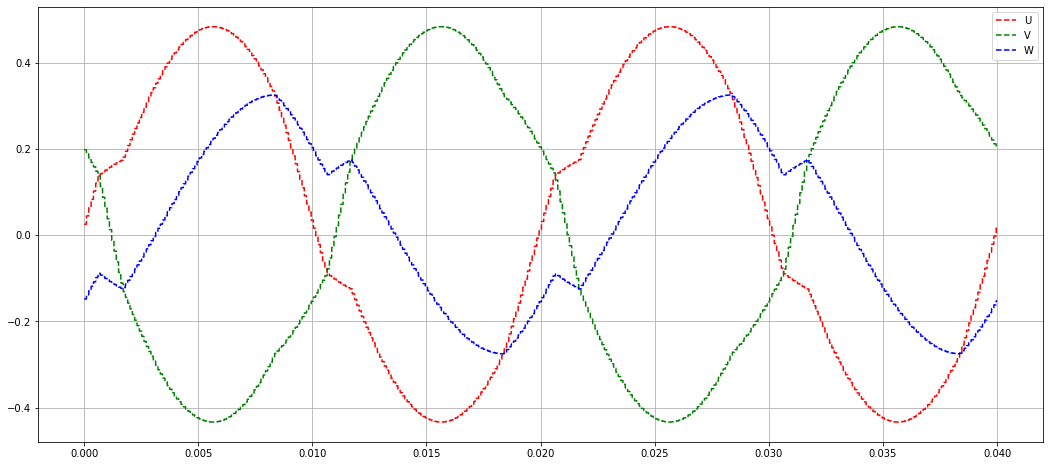

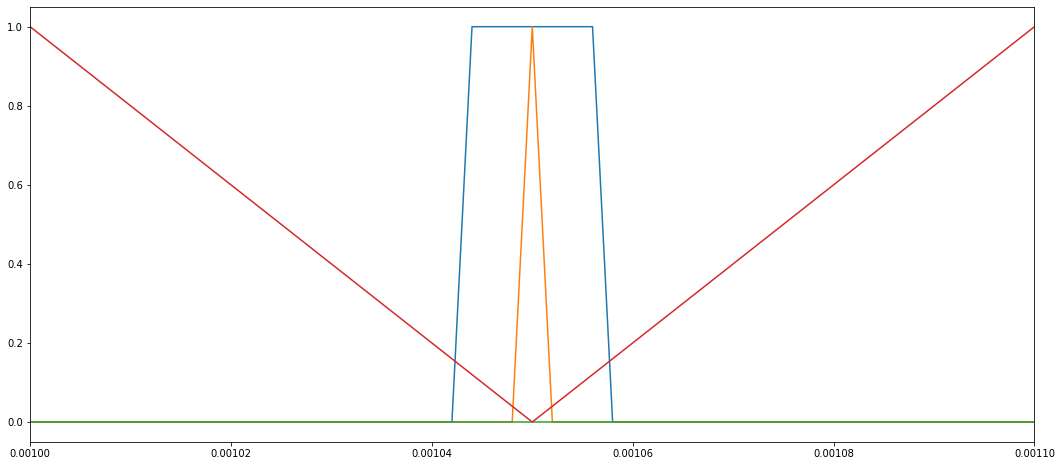

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../PlainC/cmake-build-debug/export.csv", names=["t","U","V","W", "pU", "pV", "pW", "vtr"])

t = df["t"].values
a = df["U"].values
b = df["V"].values
c = df["W"].values

pa = df["pU"].values
pb = df["pV"].values
pc = df["pW"].values
vtr = df["vtr"].values

plt.figure(figsize=(18, 8))
plt.plot(t, a, 'r--', label='U')
plt.plot(t, b, 'g--', label='V')
plt.plot(t, c, 'b--', label='W');
plt.grid()
plt.legend()
#plt.xlim([1e-6,1.1e-6])

plt.figure(figsize=(18, 8))
plt.plot(t, pa)
plt.plot(t, pb)
plt.plot(t, pc)
plt.plot(t, vtr)
plt.xlim([1e-3,1.1e-3])

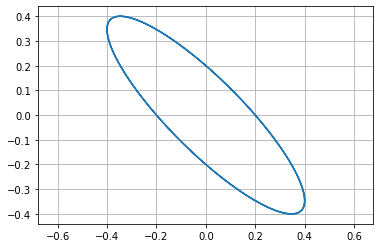

In [58]:
MClark = 2 / 3 * np.array([
    [1, -0.5, -0.5],
    [0, np.sqrt(3) / 2, -np.sqrt(3) / 2],
])

Vref = np.array([a,b,c])
Vref = np.dot(MClark, Vref)

plt.plot(Vref[0], Vref[1])
plt.axis('equal');
plt.grid()

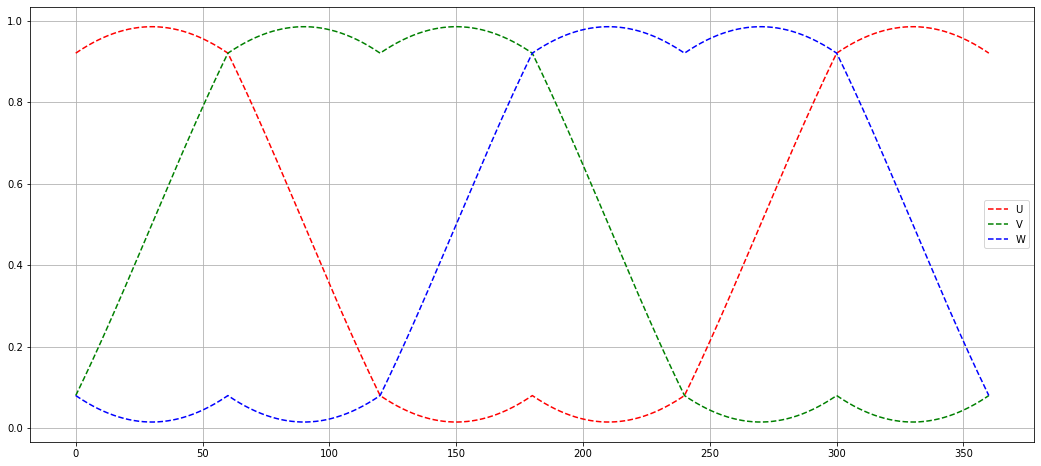

In [30]:
df = pd.read_csv("../PlainC/cmake-build-debug/export.csv", names=["t","U","V","W"])


t = np.rad2deg(df["t"].values)
a = df["U"].values
b = df["V"].values
c = df["W"].values

plt.figure(figsize=(18, 8))
plt.plot(t, a, 'r--', label='U')
plt.plot(t, b, 'g--', label='V')
plt.plot(t, c, 'b--', label='W');
plt.grid()
plt.legend();

In [25]:
np.rad2deg(4/3*np.pi), np.rad2deg(5/3*np.pi) 

(239.99999999999997, 300.0)

In [28]:
4/3*np.pi , 5/3*np.pi

(4.1887902047863905, 5.235987755982989)